In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('iris.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.columns = ('SL', 'SW', 'PL', 'PW', 'Species')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SL       150 non-null    float64
 1   SW       150 non-null    float64
 2   PL       150 non-null    float64
 3   PW       150 non-null    float64
 4   Species  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.size

750

In [10]:
print('Total Number of Null Values in Dataset:')
df.isnull().sum()

Total Number of Null Values in Dataset:


SL         0
SW         0
PL         0
PW         0
Species    0
dtype: int64

In [11]:
print('Statistical information of Numerical Columns:')
df.describe()

Statistical information of Numerical Columns:


,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
# Label encoding
df['Species']=df['Species'].astype('category')
df['Species']=df['Species'].cat.codes

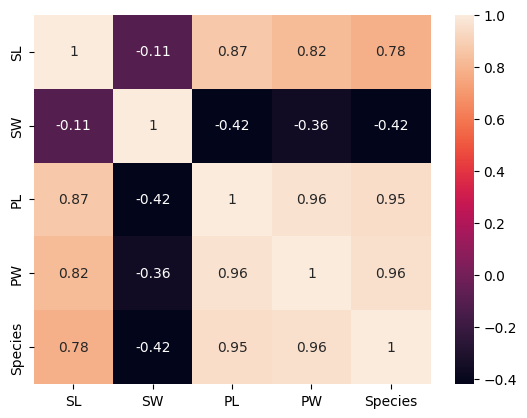

In [13]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [15]:
def BuildModel(X, Y):
# Training and testing data
    from sklearn.model_selection import train_test_split
# Assign test data size 20%
    xtrain, xtest, ytrain, ytest =train_test_split(X,Y,test_size= 0.25, random_state=0)
# from sklearn.linear_model import LogisticRegression
# model = LogisticRegression(solver = 'lbfgs')
    from sklearn.naive_bayes import GaussianNB
    model = GaussianNB()
    model = model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(ytest, ypred)
    sns.heatmap(cm, annot=True)
    plt.show()
    from sklearn.metrics import classification_report
    print(classification_report(ytest, ypred))

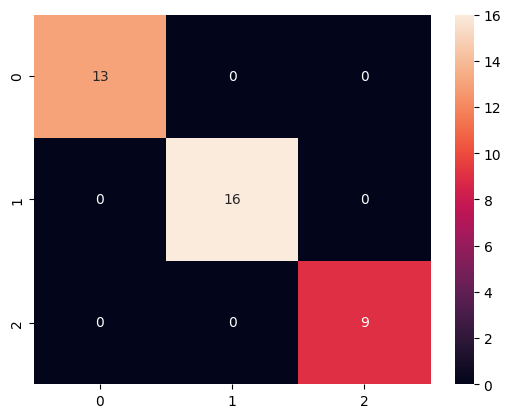

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         9

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [16]:
X = df[['SL','SW', 'PL', 'PW']]
Y = df['Species']
BuildModel(X, Y)

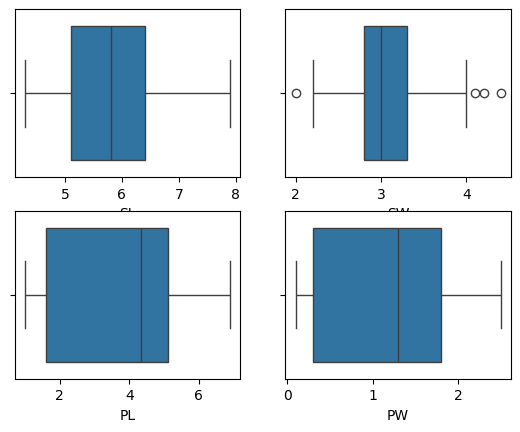

In [17]:
# Checking model score after removing outliers
fig, axes = plt.subplots(2,2)
sns.boxplot(data = df, x ='SL', ax=axes[0,0])
sns.boxplot(data = df, x ='SW', ax=axes[0,1])
sns.boxplot(data = df, x ='PL', ax=axes[1,0])
sns.boxplot(data = df, x ='PW', ax=axes[1,1])
plt.show()

In [18]:
def RemoveOutlier(df,var):
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    high, low = Q3+1.5*IQR, Q1-1.5*IQR
    print("Highest allowed in variable:", var, high)
    print("lowest allowed in variable:", var, low)
    count = df[(df[var] > high) | (df[var] < low)][var].count()
    print('Total outliers in:',var,':',count)
    df = df[((df[var] >= low) & (df[var] <= high))]
    return df

In [19]:
df = RemoveOutlier(df, 'SW')

Highest allowed in variable: SW 4.05
lowest allowed in variable: SW 2.05
Total outliers in: SW : 4


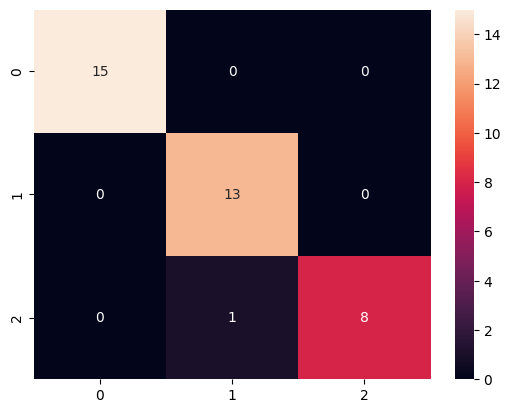

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      1.00      0.96        13
           2       1.00      0.89      0.94         9

    accuracy                           0.97        37
   macro avg       0.98      0.96      0.97        37
weighted avg       0.97      0.97      0.97        37



In [20]:
# Choosing input and output variables from correlation matrix
X = df[['SL','SW', 'PL', 'PW']]
Y = df['Species']
BuildModel(X, Y)